In [39]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from sympy import diff,solve

In [45]:
def plot(g_a,g_b,g_L,A = 0,x_range = [0,1],y_range = [0,0]):
    x_a, x_b, x_L, z_a, z_b = sy.symbols(' x_a, x_b, x_L, z_alpha, z_beta')
    
    def beta_L(X,A):
        eq1 = (-diff(g_L) + diff(g_b))
        eq2 = (-diff(g_b) + (g_b - g_L)/(x_b - x_L))
        sol = solve((eq1,eq2),[x_b,x_L])

        x_b_,x_L_ = sol[0][0],sol[0][1]
        z_b_ = (X - x_L_)/(x_b_ - x_L_)
        z_L_ = 1 - z_b_
        if min(x_b_,x_L_,z_b_,z_L_) < 0 or max(x_b_,x_L_,z_b_,z_L_) > 1:
            return float('inf')
        else:
        #         return sol
            return z_b_*g_b.subs(x_b, x_b_) + z_L_*g_L.subs(x_L, x_L_)

    def alpha_L(X,A):
        eq1 = (-diff(g_L) + diff(g_a))
        eq2 = (-diff(g_a) + (g_a - g_L)/(x_a - x_L))
        sol = solve((eq1,eq2),[x_a,x_L])

        x_a_,x_L_ = sol[0][0],sol[0][1]
        z_a_ = (X - x_L_)/(x_a_ - x_L_)
        z_L_ = 1 - z_a_
        if min(x_a_,x_L_,z_a_,z_L_) < 0 or max(x_a_,x_L_,z_a_,z_L_) > 1:
            return float('inf')
        else:
    #         return sol
            return z_a_*g_a.subs(x_a, x_a_) + z_L_*g_L.subs(x_L, x_L_)

    def alpha_beta(X,A):
        eq1 = (-diff(g_a) + diff(g_b))
        eq2 = (-diff(g_b) + (g_b - g_a + A*(1-2*(x_a-X)/(x_a-x_b)))/(x_b - x_a))
        sol = solve((eq1,eq2),[x_a,x_b])

        x_a_,x_b_ = sol[0][0],sol[0][1]
        z_a_ = (X - x_b_)/(x_a_ - x_b_)
        z_b_ = 1 - z_a_

        if min(x_a_,x_b_,z_a_,z_b_) <= 0 or max(x_a_,x_b_,z_a_,z_b_) >= 1:
            return float('inf')
        else:
    #         return sol,z_a_,z_b_
            return z_a_*g_a.subs(x_a,x_a_) + z_b_*g_b.subs(x_b,x_b_) + A*z_a_*z_b_

    def alpha_beta_L(X,A):
        eq1 = (-diff(g_a) + diff(g_b))
        eq2 = (-diff(g_b) + diff(g_L))
        eq3 = (-diff(g_L) + (g_a - g_L + A*z_b)/(x_a - x_L))
        eq4 = (-diff(g_L) + (g_b - g_L + A*z_a)/(x_b - x_L))
        eq5 = (X - ((1-z_a-z_b)*x_L + z_a*x_a + z_b*x_b))
        sol = solve((eq1,eq2,eq3,eq4,eq5),[x_a,x_b,x_L,z_a,z_b])

        if np.size(sol) == 0:
            return float('inf')
        else:
            x_a_,x_b_,x_L_ = sol[0][0],sol[0][1],sol[0][2]
            z_a_,z_b_ = sol[0][3],sol[0][4]
            z_L_ = 1-z_a_-z_b_
            if min(x_a_,x_b_,z_a_,z_b_,z_L_) <= 0 or max(x_a_,x_b_,z_a_,z_b_,z_L_) >= 1:
                return float('inf')
            else:
    #             return sol
                return z_a_*g_a.subs(x_a,x_a_) + z_b_*g_b.subs(x_b,x_b_) + z_L_*g_L.subs(x_L,x_L_) + A*z_a_*z_b_
    
    g_a1 = sy.lambdify(x_a,g_a)
    g_b1 = sy.lambdify(x_b,g_b)
    g_L1 = sy.lambdify(x_L,g_L)
    
    x_grid = np.linspace(0,1,50)
    al,bl,ab,abl = [],[],[],[]
    
    for i in x_grid:
        al.append(alpha_L(i,A))
        bl.append(beta_L(i,A))
        ab.append(alpha_beta(i,A))
        abl.append(alpha_beta_L(i,A))
        
    plt.plot(x_grid,bl,label = 'β + L',color = 'dimgray')
    plt.plot(x_grid,al,label = 'α + L',color = 'silver')
    plt.plot(x_grid,ab,label = 'α + β',color = 'blue')
    plt.plot(x_grid,abl,label = 'α + β + L',color = 'r',linewidth = 2)
    plt.plot(x_grid,g_a1(x_grid),label = 'α',color = 'blue',linestyle = 'dashed')
    plt.plot(x_grid,g_b1(x_grid),label = 'β',color = 'blue',linestyle = 'dashed')
    plt.plot(x_grid,g_L1(x_grid),label = 'L',color = 'black')
    plt.title('A = ' + str(A))
    plt.xlabel('X')
    plt.ylabel('G')
    plt.legend()
    if y_range == [0,0]:
        plt.xlim(x_range[0],x_range[1])
    else:
        plt.ylim(y_range[0],y_range[1])
        plt.xlim(x_range[0],x_range[1])
    plt.show()
    

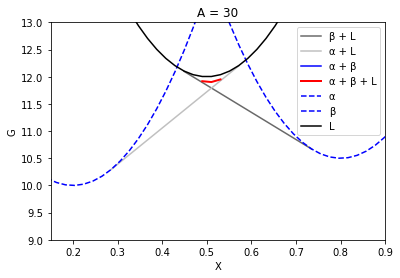

In [44]:
#for example (un-comment to see how to input)
x_a, x_b, x_L = sy.symbols('x_a, x_b, x_L')

x_a0,x_L0,x_b0 = .2,.5,.8
b_a,b_L,b_b = 10,12,10.5
a = 40

g_a = a*(x_a-x_a0)**2 + b_a
g_b = a*(x_b-x_b0)**2 + b_b
g_L = a*(x_L-x_L0)**2 + b_L

plot(g_a,g_b,g_L,A = 30, x_range = [.15,.9],y_range = [9,13])